In [753]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA, KernelPCA, DictionaryLearning, FactorAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import (
    PowerTransformer, StandardScaler, PolynomialFeatures,
    FunctionTransformer, OneHotEncoder, LabelBinarizer,
    label_binarize)
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from statsmodels.stats.diagnostic import kstest_normal, normal_ad
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.cluster import FeatureAgglomeration
from sklearn.base import BaseEstimator, TransformerMixin

In [852]:
# take the residual of all features, by fitting a model containing the feature names
class ResidFeatures(BaseEstimator, TransformerMixin):
    # Class Constructor 
    def __init__(self, feature_idxs):
        self._feature_idxs = feature_idxs
    
    #Return self nothing else to do here    
    def fit(self, X, y = None):
        return self 
    
    def _linr(self, X, y):
        lm = LinearRegression().fit(X, y)
        return np.atleast_2d(y - lm.predict(X)).T

    # take the residual from variables of non-interest
    def transform(self, X, y = None):
        feature_X = np.hstack(
            [label_binarize(X[:,f], np.unique(X[:,f]))
             if type(X[0,f]) == str else np.atleast_2d(X[:,f]).T
             for f in self._feature_idxs]
        )
        new_X = np.delete(X, self._feature_idxs, axis=1)
        resid_X = np.hstack([self._linr(feature_X, new_X[:,c]) for c in range(new_X.shape[1])])
            
        return resid_X 

In [844]:
resf = ResidFeatures(feature_idxs=[1856, 1855, 1854])

In [845]:
resf.transform(imputed_df.values).shape

> <ipython-input-843-6498516310ad>(18)transform()
-> feature_X = np.hstack(
(Pdb) c


(88, 1854)

In [775]:
imputed_df["gender"] = bp_df["gender"]
imputed_df["group"] = bp_df['group']
imputed_df['age'] = bp_df['age']

In [777]:
imputed_df[]

Index(['allvol_unknown', 'allvol_ctx_rh_posterior_insula',
       'allvol_ctx_lh_posterior_insula', 'allvol_ctx_rh_parietal_operculum',
       'allvol_ctx_lh_parietal_operculum', 'allvol_left_lateral_ventricle',
       'allvol_left_inf_lat_vent', 'allvol_ctx_rh_post_orbital_gyrus',
       'allvol_left_cerebellum_wm', 'allvol_ctx_lh_post_orbital_gyrus',
       ...
       '31p_l_wm_parcing_aatp', '31p_cc_ant_ph', '31p_cc_ant_gatp',
       '31p_cc_ant_aatp', '31p_l_pat_ph', '31p_l_pat_gatp', '31p_l_pat_aatp',
       'gender', 'group', 'age'],
      dtype='object', length=1857)

In [2]:
DATA_PATH = '../data/BipolarDerivedDataTraining.csv'
NTHREADS = 32

In [3]:
bp_df = pd.read_csv(DATA_PATH)

In [747]:
bp_df.columns.get_loc('gender')

3

In [751]:
X = np.hstack([label_binarize(bp_df.values[:,f], np.unique(bp_df.values[:,f])) for f in [1, 3]])

In [732]:
y = bp_df["allvol_unknown"]

In [739]:
lm = LinearRegression().fit(X, y)

In [744]:
y - lm.predict(X)

-5.291605537587946e-11

In [709]:
bp_df.columns[0:20]

Index(['record_id', 'group', 'age', 'gender', 'handedness', 'ses_ladder_rung',
       'history_smoking', 'frequency_currentsmoking',
       'age_at_first_mood_syndrome', 'madrs_score', 'ymrs_score',
       'suicideideation_rating_mostsevere_life',
       'suicideideation_rating_mostsevere_1month',
       'suicideattempts_lifetimenumber', 'allvol_unknown',
       'allvol_ctx_rh_posterior_insula', 'allvol_ctx_lh_posterior_insula',
       'allvol_ctx_rh_parietal_operculum', 'allvol_ctx_lh_parietal_operculum',
       'allvol_left_lateral_ventricle'],
      dtype='object')

In [708]:
bp_df[['group', 'madrs_score', 'ymrs_score']]

,group,madrs_score,ymrs_score
0,Case,11,7
1,Case,23,14
2,Case,28,0
3,Case,13,4
4,Case,28,17
5,Case,3,1
6,Case,19,8
7,Case,7,4
8,Case,17,12
9,Case,3,0


In [717]:
enc = LabelBinarizer()
enc.fit(bp_df[['gender']])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [719]:
enc.transform(bp_df[['gender']])

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0,

In [802]:
# select the t1r columns
p31_df = bp_df.filter(regex=("age$|gender|handedness|31p.*[^r]$|t1r.*_m|alff.*_m|vol|dti"))
display(p31_df.shape)
p31_df.head()

(88, 1857)

,age,gender,handedness,allvol_unknown,allvol_ctx_rh_posterior_insula,allvol_ctx_lh_posterior_insula,allvol_ctx_rh_parietal_operculum,allvol_ctx_lh_parietal_operculum,allvol_left_lateral_ventricle,allvol_left_inf_lat_vent,...,31p_r_paroperc_aatp,31p_l_wm_parcing_ph,31p_l_wm_parcing_gatp,31p_l_wm_parcing_aatp,31p_cc_ant_ph,31p_cc_ant_gatp,31p_cc_ant_aatp,31p_l_pat_ph,31p_l_pat_gatp,31p_l_pat_aatp
0,29,Female,Right,6281946,1708,1893,1895,2076,183,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52,Female,Right,6300324,2079,2096,2211,2329,217,22,...,3318770.0,7.24271,8032880.0,5110710.0,7.24266,5918480.0,8678260.0,7.24003,3556370.0,3544560.0
2,51,Female,Right,6219262,2527,2301,2922,2807,246,17,...,2835030.0,7.16535,8229570.0,2739530.0,7.16537,8242230.0,3362510.0,7.16535,6115790.0,4545140.0
3,57,Female,Right,7132726,1984,2058,2567,1479,187,6,...,2967320.0,7.18370,7300780.0,3713600.0,7.23577,9900240.0,3497420.0,7.23599,5744920.0,3075420.0
4,41,Female,Right,6054574,1953,1776,1935,1989,173,22,...,4644190.0,7.31287,16120700.0,5263040.0,7.30877,13869000.0,6048170.0,7.30881,11416500.0,3904680.0


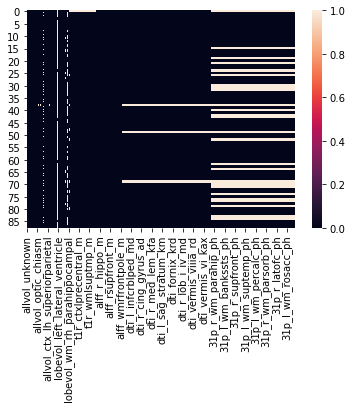

In [419]:
sns.heatmap(p31_df.isna())

In [420]:
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
imputer.fit(p31_df)
imputed_values = imputer.transform(p31_df)

In [421]:
imputed_df = pd.DataFrame(imputed_values, columns=p31_df.columns)
imputed_df.head()

,allvol_unknown,allvol_ctx_rh_posterior_insula,allvol_ctx_lh_posterior_insula,allvol_ctx_rh_parietal_operculum,allvol_ctx_lh_parietal_operculum,allvol_left_lateral_ventricle,allvol_left_inf_lat_vent,allvol_ctx_rh_post_orbital_gyrus,allvol_left_cerebellum_wm,allvol_ctx_lh_post_orbital_gyrus,...,31p_r_paroperc_aatp,31p_l_wm_parcing_ph,31p_l_wm_parcing_gatp,31p_l_wm_parcing_aatp,31p_cc_ant_ph,31p_cc_ant_gatp,31p_cc_ant_aatp,31p_l_pat_ph,31p_l_pat_gatp,31p_l_pat_aatp
0,6281946.0,1708.0,1893.0,1895.0,2076.0,183.0,28.0,2282.0,11770.0,2775.0,...,4.447520e+06,7.187221,7.960673e+06,6.533228e+06,6.920339,1.056793e+07,4.058910e+06,6.975012,1.069815e+07,3.251265e+06
1,6300324.0,2079.0,2096.0,2211.0,2329.0,217.0,22.0,2529.0,14655.0,2198.0,...,3.318770e+06,7.242710,8.032880e+06,5.110710e+06,7.242660,5.918480e+06,8.678260e+06,7.240030,3.556370e+06,3.544560e+06
2,6219262.0,2527.0,2301.0,2922.0,2807.0,246.0,17.0,2955.0,13294.0,3238.0,...,2.835030e+06,7.165350,8.229570e+06,2.739530e+06,7.165370,8.242230e+06,3.362510e+06,7.165350,6.115790e+06,4.545140e+06
3,7132726.0,1984.0,2058.0,2567.0,1479.0,187.0,6.0,3093.0,11416.0,2914.0,...,2.967320e+06,7.183700,7.300780e+06,3.713600e+06,7.235770,9.900240e+06,3.497420e+06,7.235990,5.744920e+06,3.075420e+06
4,6054574.0,1953.0,1776.0,1935.0,1989.0,173.0,22.0,2772.0,10825.0,2779.0,...,4.644190e+06,7.312870,1.612070e+07,5.263040e+06,7.308770,1.386900e+07,6.048170e+06,7.308810,1.141650e+07,3.904680e+06


In [422]:
imputed_df['31p_l_pat_aatp']

0     3.251265e+06
1     3.544560e+06
2     4.545140e+06
3     3.075420e+06
4     3.904680e+06
5     4.689150e+06
6     4.044550e+06
7     3.584500e+06
8     6.700750e+06
9     6.442820e+06
10    4.042260e+05
11    4.783130e+06
12    5.297480e+06
13    5.961710e+06
14    2.380010e+06
15   -9.379560e+05
16    9.164790e+06
17    7.953000e+06
18    4.251400e+06
19    8.067943e+06
20    1.102400e+07
21    5.517233e+06
22    1.312890e+07
23    7.253280e+06
24    7.375576e+06
25    3.256990e+06
26    5.131070e+06
27    5.861150e+06
28    4.667660e+06
29    1.387640e+07
          ...     
58    5.406260e+06
59    3.227640e+06
60    5.981970e+06
61    3.341830e+06
62    8.809960e+05
63    4.269350e+06
64    9.517363e+06
65    4.033600e+06
66    3.597260e+06
67    3.420730e+06
68    3.170740e+06
69    7.038685e+06
70    5.175010e+06
71    2.792278e+06
72    5.332180e+06
73    1.197200e+07
74    5.867632e+06
75    2.278810e+07
76    1.030147e+06
77    6.718477e+06
78    8.325060e+06
79    6.4743

In [434]:
from matplotlib.ticker import NullFormatter

In [693]:
bp_male_female = bp_df.loc[bp_df["gender"] != 'Transgender-does not identify as Male or Female',:]
imputed_male_female = imputed_df.loc[bp_df["gender"] != 'Transgender-does not identify as Male or Female',:]
p31_male_female = p31_df.loc[bp_df["gender"] != 'Transgender-does not identify as Male or Female',:]
gender = bp_male_female["gender"]

In [691]:
bp_male_female["gender"].describe()

count         87
unique         2
top       Female
freq          55
Name: gender, dtype: object

In [682]:
y = bp_male_female["gender"]
red = y == "Male"
green = y == "Female"

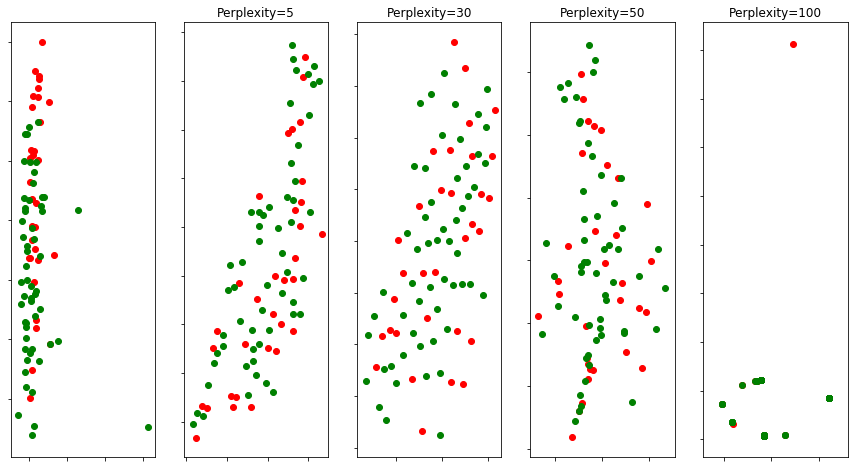

In [688]:
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]
ax = subplots[0]
ax.scatter(imputed_male_female.values[red, 0], imputed_male_female.values[red, 1], c="r")
ax.scatter(imputed_male_female.values[green, 0], imputed_male_female.values[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    tsne = TSNE(n_components=2, init='random',
                random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(imputed_male_female.values)
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

In [433]:
tsne = TSNE(n_components=2)
Y = tsne.fit_transform(imputed_values)

In [447]:
pvalues = {}
for col in imputed_df.columns:
    kstat, pvalue = kstest_normal(imputed_df[col].dropna(), dist='norm', pvalmethod='table')
    pvalues[col] = pvalue
not_normal_columns = [col for col,val in pvalues.items() if val < 0.05]

In [851]:
not_normal_indices = [imputed_df.columns.get_loc(col) for col in not_normal_columns]
# after imputation these columns are placed at the end of the matrix (passthrough)
resid_feature_idxs = np.arange(len(p31_df.columns) - 3, len(p31_df.columns))
resid_feature_idxs

array([1854, 1855, 1856])

In [258]:
group = bp_df['group']

In [825]:
X_train, X_test, y_train, y_test = train_test_split(p31_df, group, test_size=10, stratify=group)

In [489]:
# setup PCA

placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

# resid = ResidFeatures(feature_idxs=resid_feature_idxs)

lognorm = ColumnTransformer(
    remainder='passthrough',
    transformers=[('not_normal', PowerTransformer(standardize=False), not_normal_indices)])

scaler = StandardScaler()

pca = PCA()
# define the options I would like to vary within PCA
n_components_opts = [32, 64, 80, 100]
whiten_opts = [False, True]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_params = [
    {
        'lognorm': (lognorm,),
        'pca__n_components': n_components_opts,
        'pca__whiten': whiten_opts,
    },
    {
        'lognorm': (placeholder,),
        'pca__n_components': n_components_opts,
        'pca__whiten': whiten_opts,
    }
]


pipeline = Pipeline([("imp", imputer), ("lognorm", placeholder), ("scaler", scaler), ("pca", pca), ("clf", clf)])

In [490]:
search = GridSearchCV(pipeline, n_jobs=NTHREADS, param_grid=grid_params, cv=10, scoring='roc_auc', verbose=2)

In [491]:
search.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.


ValueError: Input contains infinity or a value too large for dtype('float64').

In [458]:
search.score(X_test, y_test)

0.625

In [459]:
search.best_score_

0.5666666666666667

In [460]:
search.predict(X_test)

array(['Case', 'Case', 'Control', 'Case', 'Control', 'Control', 'Case',
       'Case', 'Control', 'Case'], dtype=object)

In [461]:
search.best_params_

{'lognorm': FunctionTransformer(accept_sparse=False, check_inverse=True, func=None,
                     inv_kw_args=None, inverse_func=None, kw_args=None,
                     validate=False),
 'pca__n_components': 64,
 'pca__whiten': True}

In [462]:
y_test.values

array(['Control', 'Case', 'Control', 'Case', 'Case', 'Control', 'Case',
       'Control', 'Case', 'Case'], dtype=object)

In [463]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lognorm,param_pca__n_components,param_pca__whiten,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,42.456985,0.883849,0.000000,0.000000,"ColumnTransformer(n_jobs=None, remainder='drop...",8,False,"{'lognorm': ColumnTransformer(n_jobs=None, rem...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,42.399409,1.321725,0.000000,0.000000,"ColumnTransformer(n_jobs=None, remainder='drop...",8,True,"{'lognorm': ColumnTransformer(n_jobs=None, rem...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
2,42.265261,0.832807,0.000000,0.000000,"ColumnTransformer(n_jobs=None, remainder='drop...",16,False,"{'lognorm': ColumnTransformer(n_jobs=None, rem...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
3,42.311793,0.722117,0.000000,0.000000,"ColumnTransformer(n_jobs=None, remainder='drop...",16,True,"{'lognorm': ColumnTransformer(n_jobs=None, rem...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
4,42.344186,0.860905,0.000000,0.000000,"ColumnTransformer(n_jobs=None, remainder='drop...",32,False,"{'lognorm': ColumnTransformer(n_jobs=None, rem...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
5,42.270910,0.932499,0.000000,0.000000,"ColumnTransformer(n_jobs=None, remainder='drop...",32,True,"{'lognorm': ColumnTransformer(n_jobs=None, rem...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
6,42.698929,0.908653,0.000000,0.000000,"ColumnTransformer(n_jobs=None, remainder='drop...",64,False,"{'lognorm': ColumnTransformer(n_jobs=None, rem...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
7,42.712504,0.577523,0.000000,0.000000,"ColumnTransformer(n_jobs=None, remainder='drop...",64,True,"{'lognorm': ColumnTransformer(n_jobs=None, rem...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
8,42.808897,0.715787,0.000000,0.000000,"ColumnTransformer(n_jobs=None, remainder='drop...",80,False,"{'lognorm': ColumnTransformer(n_jobs=None, rem...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
9,42.825375,0.598766,0.000000,0.000000,"ColumnTransformer(n_jobs=None, remainder='drop...",80,True,"{'lognorm': ColumnTransformer(n_jobs=None, rem...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


In [464]:
search.cv_results_

{'mean_fit_time': array([42.45698512, 42.39940941, 42.26526127, 42.31179342, 42.3441864 ,
        42.27090995, 42.69892931, 42.71250355, 42.80889733, 42.82537529,
        42.18470459, 42.11127374, 42.31809089, 42.32536099, 42.27644317,
        42.53420572, 41.55579171, 41.25703557, 41.35166156, 40.64608395,
        40.6652626 , 40.7096941 , 38.41391454, 36.6596858 ]),
 'std_fit_time': array([0.88384947, 1.32172547, 0.83280713, 0.7221166 , 0.86090493,
        0.93249934, 0.90865336, 0.57752331, 0.71578728, 0.59876561,
        0.45395331, 0.66555322, 0.68525581, 0.83637299, 0.72115521,
        0.79455839, 0.9645181 , 0.81232296, 0.67494203, 0.59039117,
        0.73609839, 0.64462041, 2.07659105, 0.66028259]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.95093303, 2.96343229, 3.25890822,
        3.12923284, 2.71747503, 2.77641072, 2.77825203, 2.74

In [813]:
# looks like lognorm does not help
len(p31_df.columns)

1857

In [826]:
pca_columns = np.arange(len(p31_df.columns) - len(resid_feature_idxs))

In [827]:
pca_columns

array([   0,    1,    2, ..., 1851, 1852, 1853])

In [837]:
imputation_columns = np.arange(len(resid_feature_idxs), len(p31_df.columns))
imputation_columns

array([   3,    4,    5, ..., 1854, 1855, 1856])

In [840]:
placeholder = FunctionTransformer()
imputer = ColumnTransformer(
    remainder='passthrough',
    transformers=[('impute', IterativeImputer(initial_strategy='median',
                                              imputation_order='random',
                                              sample_posterior=True,
                                              max_iter=10,
                                              n_nearest_features=50),
                    imputation_columns)])

add_indicator_opts = [False, True]

resid = ResidFeatures(feature_idxs=resid_feature_idxs)

pcable = ColumnTransformer(
    remainder='passthrough',
    transformers=[('preproc', Pipeline([("scaler", StandardScaler()),
                                       ("pca", PCA())]), pca_columns)])
# define the options I would like to vary within PCA
n_components_opts = [32, 64, 80, 100]
whiten_opts = [False, True]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsA = [
    {
        'pcable__preproc__pca__n_components': n_components_opts,
        'pcable__preproc__pca__whiten': whiten_opts,
        'imp__impute__add_indicator': add_indicator_opts,
    },
]


pipelineA = Pipeline([("imp", imputer), ("resid", resid), ("pcable", pcable), ("clf", clf)])

In [841]:
searchA = GridSearchCV(pipelineA, n_jobs=NTHREADS, param_grid=grid_paramsA, cv=10, scoring='roc_auc', verbose=2)

In [842]:
searchA.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
[Parallel(n_jobs=32)]: Done 160 out of 160 | elapsed:  4.6min finished


TypeError: 'NoneType' object is not iterable

In [698]:
searchA.score(X_test, y_test)

0.9583333333333334

In [699]:
searchA.best_score_

0.8833333333333334

In [700]:
searchA.predict(X_test)

array(['Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Female'], dtype=object)

In [701]:
searchA.best_params_

{'imp__add_indicator': False,
 'pcable__preproc__pca__n_components': 64,
 'pcable__preproc__pca__whiten': False}

In [702]:
searchA_df = pd.DataFrame(searchA.cv_results_)
searchA_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_imp__add_indicator,param_pcable__preproc__pca__n_components,param_pcable__preproc__pca__whiten,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,50.781636,1.877428,5.371616,2.182104,False,32,False,"{'imp__add_indicator': False, 'pcable__preproc...",0.933333,0.200000,...,1.000000,0.800000,1.0,1.0,1.0,1.0,0.7,0.856667,0.239467,6
1,50.970298,1.401563,5.423240,2.105008,False,32,True,"{'imp__add_indicator': False, 'pcable__preproc...",0.866667,0.533333,...,1.000000,0.733333,1.0,1.0,1.0,1.0,0.7,0.876667,0.157797,5
2,50.621261,1.403774,5.330932,2.111170,False,64,False,"{'imp__add_indicator': False, 'pcable__preproc...",0.933333,0.200000,...,1.000000,0.866667,1.0,1.0,1.0,1.0,0.9,0.883333,0.232499,1
3,50.275531,1.380996,5.190590,1.946808,False,64,True,"{'imp__add_indicator': False, 'pcable__preproc...",0.933333,0.400000,...,1.000000,0.800000,1.0,1.0,1.0,1.0,0.7,0.883333,0.189297,3
4,50.508410,1.361604,0.000000,0.000000,False,80,False,"{'imp__add_indicator': False, 'pcable__preproc...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,50.653814,1.810473,0.000000,0.000000,False,80,True,"{'imp__add_indicator': False, 'pcable__preproc...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
6,49.712424,1.708206,0.000000,0.000000,False,100,False,"{'imp__add_indicator': False, 'pcable__preproc...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
7,49.943377,1.797749,0.000000,0.000000,False,100,True,"{'imp__add_indicator': False, 'pcable__preproc...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
8,50.109034,1.308073,5.118075,2.006325,True,32,False,"{'imp__add_indicator': True, 'pcable__preproc_...",0.866667,0.200000,...,1.000000,0.733333,1.0,1.0,1.0,1.0,0.8,0.846667,0.234852,8
9,50.269152,1.323949,5.124784,1.960672,True,32,True,"{'imp__add_indicator': True, 'pcable__preproc_...",0.800000,0.333333,...,1.000000,0.666667,1.0,1.0,1.0,1.0,0.8,0.853333,0.206128,7


In [501]:
searchA_df.groupby('param_imp__add_indicator')['mean_test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
param_imp__add_indicator,,,,,,,,
False,4.0,0.653333,0.006086,0.646667,0.649167,0.653333,0.657500,0.660000
True,4.0,0.634583,0.016123,0.611667,0.629167,0.640000,0.645417,0.646667


In [502]:
searchA_df.groupby('param_pcable__preproc__pca__n_components')['mean_test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
param_pcable__preproc__pca__n_components,,,,,,,,
32,4.0,0.641250,0.020156,0.611667,0.637917,0.648333,0.651667,0.656667
64,4.0,0.646667,0.010274,0.635000,0.642500,0.645833,0.650000,0.660000
80,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# does not look like adding an indicator helps with the fit

In [503]:
# investigate PCA
pca_pipeline = Pipeline([("imp", imputer), ("scale", scaler), ("pca", PCA(n_components=0.99))])

In [504]:
pca_data = pca_pipeline.fit_transform(X_train)

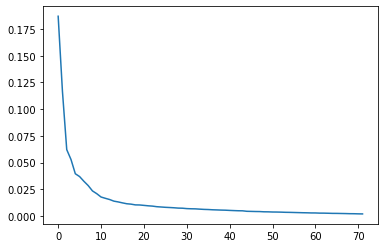

In [511]:
plt.plot(pca_pipeline.get_params()['steps'][2][1].explained_variance_ratio_)

In [571]:
# test different dimension reduction strategies (feature agglomation)
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()

ftagg = FeatureAgglomeration()
n_clusters_opts = [5, 10, 20, 50, 100]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsB = [
    {
        'ftagg__n_clusters': n_clusters_opts,
    },
]


pipelineB = Pipeline([("imp", imputer), ("scaler", scaler), ("ftagg", ftagg), ("clf", clf)])

In [572]:
searchB = GridSearchCV(pipelineB, n_jobs=NTHREADS, param_grid=grid_paramsB, cv=10, scoring='roc_auc', verbose=2)

In [573]:
searchB.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  13 out of  50 | elapsed:   57.4s remaining:  2.7min
[Parallel(n_jobs=32)]: Done  39 out of  50 | elapsed:  1.8min remaining:   30.0s
[Parallel(n_jobs=32)]: Done  50 out of  50 | elapsed:  1.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        IterativeImputer(add_indicator=False,
                                                         estimator=None,
                                                         imputation_order='random',
                                                         initial_strategy='median',
                                                         max_iter=10,
                                                         max_value=None,
                                                         min_value=None,
                                                         missing_values=nan,
                                                         n_nearest_features=50,
                                                         random_state=None,
                                                         sample_posterior=True,
                       

In [574]:
searchB.score(X_test, y_test)

0.7083333333333333

In [575]:
searchB.best_score_

0.6316666666666667

In [576]:
searchB_df = pd.DataFrame(searchB.cv_results_)
searchB_df
# use 100 clusters

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ftagg__n_clusters,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,51.168350,1.050000,5.444971,1.641992,5,{'ftagg__n_clusters': 5},1.000000,0.400000,0.133333,0.666667,0.800000,0.666667,0.333333,0.666667,0.7,0.6,0.596667,0.234970,4
1,51.458113,1.256916,5.468610,1.610148,10,{'ftagg__n_clusters': 10},0.916667,0.333333,0.600000,0.600000,0.666667,0.533333,0.533333,0.733333,0.9,0.5,0.631667,0.171018,1
2,51.271093,1.095346,5.373505,1.596534,20,{'ftagg__n_clusters': 20},0.916667,0.533333,0.333333,0.600000,0.800000,0.533333,0.400000,0.800000,0.9,0.4,0.621667,0.206297,2
3,47.454355,2.057720,4.860197,1.456849,50,{'ftagg__n_clusters': 50},0.666667,0.333333,0.533333,0.600000,0.666667,0.533333,0.533333,0.933333,0.6,0.3,0.570000,0.168951,5
4,46.007902,1.006647,4.663246,1.477119,100,{'ftagg__n_clusters': 100},0.916667,0.200000,0.600000,0.800000,0.400000,0.800000,0.400000,1.000000,0.8,0.3,0.621667,0.265628,3


In [577]:
# test different dimension reduction strategies (dictionary learning)
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)


dict_learning = DictionaryLearning()
n_components_opts = [5, 10, 20, 50]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsC = [
    {
        'dict_learning__n_components': n_components_opts,
    },
]


pipelineC = Pipeline([("imp", imputer), ("scaler", scaler), ("dict_learning", dict_learning), ("clf", clf)])

In [578]:
searchC = GridSearchCV(pipelineC, n_jobs=NTHREADS, param_grid=grid_paramsC, cv=10, scoring='roc_auc', verbose=2)

In [579]:
searchC.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=32)]: Done  19 out of  40 | elapsed:  2.0min remaining:  2.2min
[Parallel(n_jobs=32)]: Done  40 out of  40 | elapsed:  3.5min remaining:    0.0s
[Parallel(n_jobs=32)]: Done  40 out of  40 | elapsed:  3.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        IterativeImputer(add_indicator=False,
                                                         estimator=None,
                                                         imputation_order='random',
                                                         initial_strategy='median',
                                                         max_iter=10,
                                                         max_value=None,
                                                         min_value=None,
                                                         missing_values=nan,
                                                         n_nearest_features=50,
                                                         random_state=None,
                                                         sample_posterior=True,
                       

In [580]:
searchC.score(X_test, y_test)

0.4583333333333333

In [581]:
searchC_df = pd.DataFrame(searchC.cv_results_)
searchC_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dict_learning__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,63.537612,3.470520,5.296743,1.778425,5,{'dict_learning__n_components': 5},1.000000,0.466667,0.400000,0.733333,0.800000,0.666667,0.466667,0.733333,1.0,0.6,0.686667,0.200111,1
1,98.503157,13.269488,4.912798,1.593822,10,{'dict_learning__n_components': 10},0.750000,0.200000,0.400000,0.733333,0.733333,0.600000,0.200000,0.800000,0.9,0.6,0.591667,0.233957,4
2,152.532582,6.733926,4.701305,1.537805,20,{'dict_learning__n_components': 20},0.583333,0.533333,0.866667,0.733333,0.600000,0.800000,0.533333,1.000000,0.8,0.2,0.665000,0.213496,2
3,119.759467,12.371677,4.672657,1.480987,50,{'dict_learning__n_components': 50},0.500000,0.400000,0.466667,0.400000,0.533333,0.866667,0.933333,1.000000,0.8,0.6,0.650000,0.216667,3


In [582]:
# test different dimension reduction strategies (factor analysis)
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)


fa = FactorAnalysis()
n_components_opts = [5, 10, 20, 50, 100]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsD = [
    {
        'fa__n_components': n_components_opts,
    },
]


pipelineD = Pipeline([("imp", imputer), ("scaler", scaler), ("fa", fa), ("clf", clf)])

In [583]:
searchD = GridSearchCV(pipelineD, n_jobs=NTHREADS, param_grid=grid_paramsD, cv=10, scoring='roc_auc', verbose=2)

In [584]:
searchD.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  13 out of  50 | elapsed:   56.2s remaining:  2.7min
[Parallel(n_jobs=32)]: Done  39 out of  50 | elapsed:  1.8min remaining:   29.6s
[Parallel(n_jobs=32)]: Done  50 out of  50 | elapsed:  1.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        IterativeImputer(add_indicator=False,
                                                         estimator=None,
                                                         imputation_order='random',
                                                         initial_strategy='median',
                                                         max_iter=10,
                                                         max_value=None,
                                                         min_value=None,
                                                         missing_values=nan,
                                                         n_nearest_features=50,
                                                         random_state=None,
                                                         sample_posterior=True,
                       

In [585]:
searchD.score(X_test, y_test)

0.625

In [586]:
searchD_df = pd.DataFrame(searchD.cv_results_)
searchD_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fa__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,51.895858,1.051154,5.069747,1.573873,5,{'fa__n_components': 5},0.916667,0.600000,0.466667,0.600000,0.800000,0.533333,0.400000,0.666667,1.0,0.6,0.658333,0.182460,1
1,52.056608,1.580232,5.037761,1.555215,10,{'fa__n_components': 10},1.000000,0.266667,0.266667,0.400000,0.800000,0.600000,0.333333,0.733333,0.9,0.5,0.580000,0.254384,4
2,52.217199,1.273810,5.100566,1.650952,20,{'fa__n_components': 20},0.750000,0.466667,0.800000,0.400000,0.733333,0.466667,0.800000,0.866667,0.8,0.4,0.648333,0.179884,2
3,47.338124,2.318197,4.758838,1.516201,50,{'fa__n_components': 50},0.750000,0.400000,0.066667,0.266667,0.333333,0.666667,0.733333,0.800000,0.7,0.5,0.521667,0.234527,5
4,46.356737,1.197334,4.681983,1.487409,100,{'fa__n_components': 100},0.666667,0.400000,0.733333,0.200000,0.400000,0.800000,0.866667,1.000000,0.7,0.6,0.636667,0.230193,3


In [587]:
# test different dimension reduction strategies (kbest)
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)


kbest = SelectKBest()
k_opts = [5, 10, 20, 50, 100]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsE = [
    {
        'kbest__k': k_opts,
    },
]


pipelineE = Pipeline([("imp", imputer), ("scaler", scaler), ("kbest", kbest), ("clf", clf)])

In [588]:
searchE = GridSearchCV(pipelineE, n_jobs=NTHREADS, param_grid=grid_paramsE, cv=10, scoring='roc_auc', verbose=2)

In [589]:
searchE.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  13 out of  50 | elapsed:   56.2s remaining:  2.7min
[Parallel(n_jobs=32)]: Done  39 out of  50 | elapsed:  1.8min remaining:   29.7s
[Parallel(n_jobs=32)]: Done  50 out of  50 | elapsed:  1.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        IterativeImputer(add_indicator=False,
                                                         estimator=None,
                                                         imputation_order='random',
                                                         initial_strategy='median',
                                                         max_iter=10,
                                                         max_value=None,
                                                         min_value=None,
                                                         missing_values=nan,
                                                         n_nearest_features=50,
                                                         random_state=None,
                                                         sample_posterior=True,
                       

In [590]:
searchE.score(X_test, y_test)

0.375

In [591]:
searchE_df = pd.DataFrame(searchE.cv_results_)
searchE_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kbest__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,52.199339,1.092839,5.174017,1.652750,5,{'kbest__k': 5},0.166667,0.466667,0.200000,0.666667,0.333333,0.400000,0.133333,0.866667,0.5,0.4,0.413333,0.217153,5
1,51.688614,1.222331,5.148261,1.657164,10,{'kbest__k': 10},0.416667,0.066667,0.333333,0.733333,0.600000,0.533333,0.466667,0.600000,0.6,0.4,0.475000,0.176895,3
2,52.009017,1.211205,5.204220,1.672153,20,{'kbest__k': 20},0.500000,0.133333,0.000000,0.400000,0.533333,0.533333,0.666667,0.666667,0.4,0.6,0.443333,0.209788,4
3,47.543684,2.161831,4.748711,1.524960,50,{'kbest__k': 50},0.583333,0.200000,0.133333,0.533333,0.600000,0.800000,0.266667,0.933333,0.8,0.5,0.535000,0.255435,1
4,46.019299,1.270579,4.609671,1.501138,100,{'kbest__k': 100},0.500000,0.333333,0.266667,0.333333,0.600000,0.666667,0.333333,0.733333,0.6,0.7,0.506667,0.167199,2


In [592]:
# compare different dim reductions
pca = PCA(n_components=64, whiten=True)
fa = FactorAnalysis(n_components=20)
ftagg = FeatureAgglomeration(n_clusters=100)
d_learn = DictionaryLearning(n_components=5)
kbest = SelectKBest(k=50)

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsF = [
    {
        'dim_red': [pca, fa, ftagg, d_learn, kbest]
    },
]


pipelineF = Pipeline([("imp", imputer), ("scaler", scaler), ("dim_red", placeholder), ("clf", clf)])

In [593]:
searchF = GridSearchCV(pipelineF, n_jobs=NTHREADS, param_grid=grid_paramsF, cv=10, scoring='roc_auc', verbose=2)

In [594]:
searchF.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  13 out of  50 | elapsed:   55.7s remaining:  2.6min
[Parallel(n_jobs=32)]: Done  39 out of  50 | elapsed:  1.8min remaining:   30.1s
[Parallel(n_jobs=32)]: Done  50 out of  50 | elapsed:  2.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        IterativeImputer(add_indicator=False,
                                                         estimator=None,
                                                         imputation_order='random',
                                                         initial_strategy='median',
                                                         max_iter=10,
                                                         max_value=None,
                                                         min_value=None,
                                                         missing_values=nan,
                                                         n_nearest_features=50,
                                                         random_state=None,
                                                         sample_posterior=True,
                       

In [595]:
searchF.score(X_test, y_test)

0.5833333333333333

In [596]:
searchF_df = pd.DataFrame(searchF.cv_results_)
searchF_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dim_red,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,51.780167,1.261268,5.111307,1.651617,"PCA(copy=True, iterated_power='auto', n_compon...","{'dim_red': PCA(copy=True, iterated_power='aut...",0.583333,0.533333,0.866667,0.266667,0.466667,0.800000,0.800000,1.000000,0.7,0.5,0.651667,0.209291,2
1,51.626886,1.261572,5.096145,1.648758,"FactorAnalysis(copy=True, iterated_power=3, ma...","{'dim_red': FactorAnalysis(copy=True, iterated...",0.750000,0.400000,0.933333,0.533333,0.800000,0.533333,0.400000,0.866667,0.8,0.3,0.631667,0.212975,3
2,51.881423,1.206039,5.118452,1.652167,"FeatureAgglomeration(affinity='euclidean', com...",{'dim_red': FeatureAgglomeration(affinity='euc...,0.750000,0.266667,0.466667,0.800000,0.400000,0.533333,0.600000,1.000000,0.7,0.5,0.601667,0.203913,4
3,60.051697,6.528122,4.637868,1.531555,"DictionaryLearning(alpha=1, code_init=None, di...","{'dim_red': DictionaryLearning(alpha=1, code_i...",1.000000,0.400000,0.600000,0.666667,0.800000,0.600000,0.533333,0.733333,1.0,0.6,0.693333,0.184270,1
4,46.244147,1.172659,4.699633,1.616291,"SelectKBest(k=50, score_func=<function f_class...","{'dim_red': SelectKBest(k=50, score_func=<func...",0.583333,0.466667,0.200000,0.466667,0.600000,0.600000,0.400000,0.733333,0.6,0.4,0.505000,0.142605,5


In [616]:
# test adding interaction terms
poly = PolynomialFeatures(degree=1)


# place the parameters I would like to vary using a list of dictionaries
grid_paramsG = [
    {
        'dim_red': [pca, d_learn],
        'poly': [poly, placeholder],
    },
]

pipelineG = Pipeline([("imp", imputer), ("scaler", scaler), ("dim_red", placeholder), ("poly", placeholder), ("clf", clf)])

In [617]:
searchG = GridSearchCV(pipelineG, n_jobs=NTHREADS, param_grid=grid_paramsG, cv=10, scoring='roc_auc', verbose=2)

In [618]:
searchG.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   1 tasks      | elapsed:   54.2s
[Parallel(n_jobs=32)]: Done  19 out of  40 | elapsed:  1.0min remaining:  1.1min
[Parallel(n_jobs=32)]: Done  40 out of  40 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=32)]: Done  40 out of  40 | elapsed:  2.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        IterativeImputer(add_indicator=False,
                                                         estimator=None,
                                                         imputation_order='random',
                                                         initial_strategy='median',
                                                         max_iter=10,
                                                         max_value=None,
                                                         min_value=None,
                                                         missing_values=nan,
                                                         n_nearest_features=50,
                                                         random_state=None,
                                                         sample_posterior=True,
                       

In [619]:
# overfitting the data?
searchG.score(X_test, y_test)

0.20833333333333334

In [620]:
searchG.predict(X_test)

array(['Case', 'Case', 'Case', 'Case', 'Case', 'Control', 'Case',
       'Control', 'Case', 'Case'], dtype=object)

In [621]:
searchG_df = pd.DataFrame(searchG.cv_results_)
searchG_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dim_red,param_poly,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,51.821650,1.114519,5.117659,1.569014,"PCA(copy=True, iterated_power='auto', n_compon...","PolynomialFeatures(degree=1, include_bias=True...","{'dim_red': PCA(copy=True, iterated_power='aut...",0.833333,0.533333,1.000000,0.600000,0.466667,0.800000,1.000000,0.800000,0.4,0.4,0.683333,0.220731,1
1,51.701835,0.866759,5.094818,1.581639,"PCA(copy=True, iterated_power='auto', n_compon...","FunctionTransformer(accept_sparse=False, check...","{'dim_red': PCA(copy=True, iterated_power='aut...",0.833333,0.200000,0.666667,0.466667,0.600000,0.800000,0.333333,0.933333,0.4,0.2,0.543333,0.250355,2
2,64.345176,3.546137,4.716028,1.508447,"DictionaryLearning(alpha=1, code_init=None, di...","PolynomialFeatures(degree=1, include_bias=True...","{'dim_red': DictionaryLearning(alpha=1, code_i...",0.500000,0.266667,0.533333,0.466667,0.733333,0.733333,0.466667,0.600000,0.4,0.5,0.520000,0.135154,4
3,59.688224,5.421755,4.641919,1.511624,"DictionaryLearning(alpha=1, code_init=None, di...","FunctionTransformer(accept_sparse=False, check...","{'dim_red': DictionaryLearning(alpha=1, code_i...",1.000000,0.066667,0.800000,0.800000,0.600000,0.600000,0.200000,0.400000,0.6,0.3,0.536667,0.278268,3


In [602]:
# test adding interaction terms
poly = PolynomialFeatures(degree=1)
kbest = SelectKBest(k=50)

# place the parameters I would like to vary using a list of dictionaries
grid_paramsH = [
    {
        'poly': [poly, placeholder],
    },
]

pipelineH = Pipeline([("imp", imputer), ("scaler", scaler), ("dim_red", kbest), ("poly", placeholder), ("clf", clf)])

In [603]:
searchH = GridSearchCV(pipelineH, n_jobs=NTHREADS, param_grid=grid_paramsH, cv=10, scoring='roc_auc', verbose=2)

In [604]:
searchH.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  12 out of  20 | elapsed:   50.0s remaining:   33.4s
[Parallel(n_jobs=32)]: Done  20 out of  20 | elapsed:   56.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        IterativeImputer(add_indicator=False,
                                                         estimator=None,
                                                         imputation_order='random',
                                                         initial_strategy='median',
                                                         max_iter=10,
                                                         max_value=None,
                                                         min_value=None,
                                                         missing_values=nan,
                                                         n_nearest_features=50,
                                                         random_state=None,
                                                         sample_posterior=True,
                       

In [605]:
# maybe just the classifier needs to be changed?

In [606]:
searchH.score(X_test, y_test)

0.45833333333333337

In [607]:
searchH.predict(X_test)

array(['Case', 'Case', 'Control', 'Case', 'Case', 'Case', 'Case', 'Case',
       'Case', 'Case'], dtype=object)

In [608]:
searchH_df = pd.DataFrame(searchH.cv_results_)
searchH_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,45.899846,1.037496,4.645585,1.515639,"PolynomialFeatures(degree=1, include_bias=True...","{'poly': PolynomialFeatures(degree=1, include_...",0.500000,0.466667,0.266667,0.533333,0.466667,0.800000,0.400000,0.866667,0.3,0.7,0.53,0.190584,1
1,46.316148,0.983506,4.653812,1.535111,"FunctionTransformer(accept_sparse=False, check...",{'poly': FunctionTransformer(accept_sparse=Fal...,0.666667,0.200000,0.400000,0.466667,0.533333,0.533333,0.333333,0.866667,0.6,0.4,0.50,0.177012,2


In [609]:
# test with adaboost classifier
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
pca = PCA(n_components=64, whiten=True)

poly = PolynomialFeatures(degree=1)

clf = AdaBoostClassifier()
n_estimators_opts = [100, 1000, 2000]
learning_rate_opts = [0.01, 0.1, 1.]
base_estimator_opts = [None, LogisticRegression(class_weight="balanced", max_iter=1000)]


grid_paramsI = [
    {
        'clf__n_estimators': n_estimators_opts,
        'clf__learning_rate': learning_rate_opts,
        'clf__base_estimator': base_estimator_opts,
    },
]

pipelineI = Pipeline([("imp", imputer), ("scaler", scaler), ("pca", pca), ("poly", poly), ("clf", clf)])

In [610]:
searchI = GridSearchCV(pipelineI, n_jobs=NTHREADS, param_grid=grid_paramsI, cv=10, scoring='roc_auc', verbose=2)

In [611]:
searchI.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:  3.7min
[Parallel(n_jobs=32)]: Done 180 out of 180 | elapsed:  5.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        IterativeImputer(add_indicator=False,
                                                         estimator=None,
                                                         imputation_order='random',
                                                         initial_strategy='median',
                                                         max_iter=10,
                                                         max_value=None,
                                                         min_value=None,
                                                         missing_values=nan,
                                                         n_nearest_features=50,
                                                         random_state=None,
                                                         sample_posterior=True,
                       

In [612]:
searchI.score(X_test, y_test)

0.45833333333333337

In [613]:
searchI.predict(X_test)

array(['Control', 'Case', 'Case', 'Case', 'Control', 'Case', 'Control',
       'Case', 'Case', 'Case'], dtype=object)

In [614]:
searchI_df = pd.DataFrame(searchI.cv_results_)
searchI_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__base_estimator,param_clf__learning_rate,param_clf__n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,52.056717,0.996405,5.275678,1.793487,None,0.01,100,"{'clf__base_estimator': None, 'clf__learning_r...",0.500000,0.133333,...,0.433333,0.533333,0.266667,0.333333,0.733333,0.75,0.1,0.385000,0.235520,18
1,52.803234,1.265950,5.350605,1.804580,None,0.01,1000,"{'clf__base_estimator': None, 'clf__learning_r...",0.666667,0.333333,...,0.466667,0.200000,0.266667,0.600000,0.800000,0.30,0.6,0.470000,0.185263,17
2,54.424253,1.092879,5.540387,1.707114,None,0.01,2000,"{'clf__base_estimator': None, 'clf__learning_r...",0.500000,0.266667,...,0.466667,0.466667,0.466667,0.666667,0.866667,1.00,0.8,0.650000,0.241868,10
3,51.650000,1.218562,5.214984,1.664904,None,0.1,100,"{'clf__base_estimator': None, 'clf__learning_r...",0.583333,0.533333,...,0.800000,0.866667,0.266667,1.000000,0.800000,0.70,0.4,0.668333,0.211667,1
4,52.782415,1.501254,5.312818,1.823481,None,0.1,1000,"{'clf__base_estimator': None, 'clf__learning_r...",0.750000,0.200000,...,0.466667,0.800000,0.733333,0.000000,1.000000,0.70,0.3,0.595000,0.322150,13
5,54.479776,1.158285,5.514335,1.726927,None,0.1,2000,"{'clf__base_estimator': None, 'clf__learning_r...",0.500000,0.266667,...,0.333333,0.600000,0.733333,0.733333,0.866667,1.00,0.8,0.650000,0.218708,9
6,51.655274,1.118014,5.330060,1.726317,None,1,100,"{'clf__base_estimator': None, 'clf__learning_r...",0.333333,0.533333,...,0.266667,0.800000,0.733333,0.600000,0.866667,0.70,0.3,0.593333,0.213333,14
7,52.834220,0.889035,5.293366,1.695810,None,1,1000,"{'clf__base_estimator': None, 'clf__learning_r...",0.750000,0.466667,...,0.133333,0.266667,0.800000,0.933333,0.733333,0.60,0.2,0.581667,0.283867,16
8,54.214353,1.108997,5.430670,1.675566,None,1,2000,"{'clf__base_estimator': None, 'clf__learning_r...",0.500000,0.466667,...,0.400000,0.533333,0.666667,0.733333,0.733333,0.80,0.5,0.633333,0.176383,12
9,51.805978,1.228062,5.151268,1.698599,"LogisticRegression(C=1.0, class_weight='balanc...",0.01,100,{'clf__base_estimator': LogisticRegression(C=1...,0.666667,0.333333,...,0.400000,0.400000,0.800000,0.866667,0.866667,0.70,0.5,0.653333,0.221209,6


In [624]:
# gradient boost
# test with adaboost classifier
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
pca = PCA(n_components=64, whiten=True)

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier()
max_depth_opts = [3, 5, 15, 20]
n_estimators_opts = [100, 1000, 2000]
learning_rate_opts = [0.01, 0.1, 1.]


grid_paramsJ = [
    {
        'clf__n_estimators': n_estimators_opts,
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
]

pipelineJ = Pipeline([("imp", imputer), ("scaler", scaler), ("pca", pca), ("poly", poly), ("clf", clf)])

In [625]:
searchJ = GridSearchCV(pipelineJ, n_jobs=NTHREADS, param_grid=grid_paramsJ, cv=10, scoring='roc_auc', verbose=2)

In [626]:
searchJ.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:  3.8min
[Parallel(n_jobs=32)]: Done 360 out of 360 | elapsed: 11.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        IterativeImputer(add_indicator=False,
                                                         estimator=None,
                                                         imputation_order='random',
                                                         initial_strategy='median',
                                                         max_iter=10,
                                                         max_value=None,
                                                         min_value=None,
                                                         missing_values=nan,
                                                         n_nearest_features=50,
                                                         random_state=None,
                                                         sample_posterior=True,
                       

In [627]:
searchJ.predict(X_test)

array(['Case', 'Control', 'Case', 'Control', 'Case', 'Case', 'Case',
       'Case', 'Case', 'Case'], dtype=object)

In [628]:
searchJ.score(X_test, y_test)

0.4375

In [630]:
searchJ_df = pd.DataFrame(searchJ.cv_results_)
searchJ_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__learning_rate,param_clf__max_depth,param_clf__n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,54.229893,1.267133,5.268582,1.737828,0.01,3,100,"{'clf__learning_rate': 0.01, 'clf__max_depth':...",0.833333,0.400000,...,0.533333,0.800000,0.233333,0.866667,0.466667,0.70,0.30,0.593333,0.224004,8
1,55.572143,1.228647,5.350913,1.778933,0.01,3,1000,"{'clf__learning_rate': 0.01, 'clf__max_depth':...",0.333333,0.600000,...,0.800000,0.200000,0.600000,0.666667,0.733333,0.70,0.50,0.586667,0.181475,13
2,56.003041,1.185914,5.284835,1.633288,0.01,3,2000,"{'clf__learning_rate': 0.01, 'clf__max_depth':...",0.000000,0.533333,...,0.533333,0.533333,0.400000,0.733333,0.733333,0.50,0.90,0.566667,0.240370,19
3,52.047071,1.738375,5.169228,1.729845,0.01,5,100,"{'clf__learning_rate': 0.01, 'clf__max_depth':...",0.166667,0.333333,...,0.266667,1.000000,0.600000,0.666667,0.766667,0.40,0.40,0.513333,0.239072,28
4,52.303599,1.388371,5.244296,1.730611,0.01,5,1000,"{'clf__learning_rate': 0.01, 'clf__max_depth':...",0.666667,0.533333,...,0.566667,0.400000,0.566667,0.600000,0.600000,0.90,0.70,0.620000,0.123108,4
5,52.035318,1.066970,5.181788,1.725439,0.01,5,2000,"{'clf__learning_rate': 0.01, 'clf__max_depth':...",0.333333,0.200000,...,0.500000,0.733333,0.400000,0.866667,0.733333,0.90,0.40,0.536667,0.238258,24
6,51.231429,1.301078,5.200633,1.684983,0.01,15,100,"{'clf__learning_rate': 0.01, 'clf__max_depth':...",0.416667,0.466667,...,0.800000,0.900000,0.333333,0.633333,0.366667,0.40,0.30,0.511667,0.192361,30
7,52.071126,1.452696,5.270410,1.753348,0.01,15,1000,"{'clf__learning_rate': 0.01, 'clf__max_depth':...",0.250000,0.000000,...,0.200000,0.466667,0.500000,0.433333,0.800000,0.35,0.30,0.376667,0.202375,36
8,52.327974,1.153285,5.277517,1.728387,0.01,15,2000,"{'clf__learning_rate': 0.01, 'clf__max_depth':...",0.500000,0.666667,...,0.600000,0.466667,0.333333,0.733333,0.433333,0.70,1.00,0.570000,0.205183,17
9,51.541217,1.126393,5.235789,1.710099,0.01,20,100,"{'clf__learning_rate': 0.01, 'clf__max_depth':...",0.708333,0.500000,...,0.433333,0.666667,0.466667,0.600000,0.666667,0.60,0.50,0.614167,0.156261,5


In [633]:
# gradient boost
# test pca and dict_learning with gradient boost
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
pca = PCA(whiten=True)
n_components_opts = [5, 10, 20, 50, 100]

d_learn = DictionaryLearning(n_components=5)
alpha_opts = [0.01, 0.1, 1]

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier(n_estimators=1000, max_depth=25, learning_rate=0.1)


grid_paramsK = [
    {
        'dim_red': (pca,),
        'dim_red__n_components': n_components_opts,
        'poly': [placeholder, poly],
    },
    {
        'dim_red': (d_learn,),
        'dim_red__alpha': alpha_opts,
        'poly': [placeholder, poly],
    },
]

pipelineK = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("dim_red", placeholder),
                      ("poly", placeholder),
                      ("clf", clf)])

In [634]:
searchK = GridSearchCV(pipelineK, n_jobs=NTHREADS, param_grid=grid_paramsK, cv=10, scoring='roc_auc', verbose=2)

In [635]:
searchK.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 160 out of 160 | elapsed:  6.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        IterativeImputer(add_indicator=False,
                                                         estimator=None,
                                                         imputation_order='random',
                                                         initial_strategy='median',
                                                         max_iter=10,
                                                         max_value=None,
                                                         min_value=None,
                                                         missing_values=nan,
                                                         n_nearest_features=50,
                                                         random_state=None,
                                                         sample_posterior=True,
                       

In [636]:
searchK.score(X_test, y_test)

0.41666666666666663

In [637]:
searchK.predict(X_test)

array(['Control', 'Control', 'Case', 'Control', 'Case', 'Case', 'Control',
       'Control', 'Case', 'Case'], dtype=object)

In [638]:
searchK_df = pd.DataFrame(searchK.cv_results_)
searchK_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dim_red,param_dim_red__n_components,param_poly,param_dim_red__alpha,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,53.279663,1.158668,5.489052,1.788106,"PCA(copy=True, iterated_power='auto', n_compon...",5,"FunctionTransformer(accept_sparse=False, check...",NaN,"{'dim_red': PCA(copy=True, iterated_power='aut...",0.625000,...,0.733333,0.600000,0.800000,0.133333,0.200000,0.60,0.50,0.539167,0.234818,7
1,53.430155,1.030224,5.467883,1.772728,"PCA(copy=True, iterated_power='auto', n_compon...",5,"PolynomialFeatures(degree=1, include_bias=True...",NaN,"{'dim_red': PCA(copy=True, iterated_power='aut...",1.000000,...,0.400000,0.866667,0.800000,0.600000,0.800000,0.60,0.60,0.610000,0.256493,1
2,53.275643,1.331384,5.423155,1.758246,"PCA(copy=True, iterated_power='auto', n_compon...",10,"FunctionTransformer(accept_sparse=False, check...",NaN,"{'dim_red': PCA(copy=True, iterated_power='aut...",0.666667,...,0.533333,0.733333,0.533333,0.600000,0.533333,0.80,0.10,0.573333,0.178761,2
3,52.203324,1.519845,5.253496,1.718345,"PCA(copy=True, iterated_power='auto', n_compon...",10,"PolynomialFeatures(degree=1, include_bias=True...",NaN,"{'dim_red': PCA(copy=True, iterated_power='aut...",0.625000,...,0.433333,0.800000,0.566667,0.200000,0.866667,0.55,0.25,0.489167,0.220229,11
4,51.703576,1.120673,5.289504,1.739719,"PCA(copy=True, iterated_power='auto', n_compon...",20,"FunctionTransformer(accept_sparse=False, check...",NaN,"{'dim_red': PCA(copy=True, iterated_power='aut...",0.833333,...,0.600000,0.266667,0.533333,0.400000,0.333333,0.60,0.40,0.523333,0.230964,8
5,51.965034,1.532616,5.338367,1.713454,"PCA(copy=True, iterated_power='auto', n_compon...",20,"PolynomialFeatures(degree=1, include_bias=True...",NaN,"{'dim_red': PCA(copy=True, iterated_power='aut...",0.666667,...,0.400000,0.000000,0.566667,0.733333,0.700000,0.40,0.40,0.500000,0.244040,9
6,51.439887,1.173926,5.210940,1.664210,"PCA(copy=True, iterated_power='auto', n_compon...",50,"FunctionTransformer(accept_sparse=False, check...",NaN,"{'dim_red': PCA(copy=True, iterated_power='aut...",0.291667,...,0.366667,0.266667,0.366667,0.666667,0.533333,0.20,0.40,0.429167,0.193479,13
7,51.648615,1.083023,5.265548,1.703375,"PCA(copy=True, iterated_power='auto', n_compon...",50,"PolynomialFeatures(degree=1, include_bias=True...",NaN,"{'dim_red': PCA(copy=True, iterated_power='aut...",0.500000,...,0.333333,0.200000,0.666667,1.000000,0.500000,1.00,0.55,0.548333,0.267545,6
8,51.646678,1.188258,0.000000,0.000000,"PCA(copy=True, iterated_power='auto', n_compon...",100,"FunctionTransformer(accept_sparse=False, check...",NaN,"{'dim_red': PCA(copy=True, iterated_power='aut...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
9,52.263533,1.291404,0.000000,0.000000,"PCA(copy=True, iterated_power='auto', n_compon...",100,"PolynomialFeatures(degree=1, include_bias=True...",NaN,"{'dim_red': PCA(copy=True, iterated_power='aut...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [642]:
# gradient boost
# test pca and dict_learning with gradient boost
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
pca = PCA(whiten=True)
n_components_opts = [2, 3, 5, 10]

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier(n_estimators=1000, max_depth=25, learning_rate=0.1)


grid_paramsL = [
    {
        'pca__n_components': n_components_opts,
        'poly': [placeholder, poly],
    },
]

pipelineL = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("pca", pca),
                      ("poly", placeholder),
                      ("clf", clf)])

In [643]:
searchL = GridSearchCV(pipelineL, n_jobs=NTHREADS, param_grid=grid_paramsL, cv=10, scoring='roc_auc', verbose=2)

In [644]:
searchL.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  58 out of  80 | elapsed:  2.1min remaining:   46.8s
[Parallel(n_jobs=32)]: Done  80 out of  80 | elapsed:  2.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        IterativeImputer(add_indicator=False,
                                                         estimator=None,
                                                         imputation_order='random',
                                                         initial_strategy='median',
                                                         max_iter=10,
                                                         max_value=None,
                                                         min_value=None,
                                                         missing_values=nan,
                                                         n_nearest_features=50,
                                                         random_state=None,
                                                         sample_posterior=True,
                       

In [645]:
searchL.score(X_test, y_test)

0.9166666666666667

In [646]:
searchL.predict(X_test)

array(['Case', 'Control', 'Case', 'Case', 'Control', 'Case', 'Control',
       'Case', 'Case', 'Control'], dtype=object)

In [649]:
y_test.values

array(['Control', 'Control', 'Case', 'Case', 'Control', 'Case', 'Case',
       'Case', 'Case', 'Control'], dtype=object)

In [647]:
searchL_df = pd.DataFrame(searchL.cv_results_)
searchL_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_poly,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,51.819943,1.695062,5.464943,1.715114,2,"FunctionTransformer(accept_sparse=False, check...","{'pca__n_components': 2, 'poly': FunctionTrans...",0.916667,0.266667,0.600000,0.733333,0.466667,0.933333,0.266667,0.600000,1.00,0.7,0.648333,0.248154,1
1,51.408826,1.016711,5.488068,1.650481,2,"PolynomialFeatures(degree=1, include_bias=True...","{'pca__n_components': 2, 'poly': PolynomialFea...",0.708333,0.266667,0.600000,0.266667,0.433333,0.866667,0.066667,0.666667,0.60,0.6,0.507500,0.231554,5
2,51.911538,1.300946,5.398497,1.677226,3,"FunctionTransformer(accept_sparse=False, check...","{'pca__n_components': 3, 'poly': FunctionTrans...",0.666667,0.533333,0.666667,0.733333,0.500000,0.533333,0.466667,0.833333,0.60,0.5,0.603333,0.112990,2
3,51.654482,1.753709,4.835831,2.301614,3,"PolynomialFeatures(degree=1, include_bias=True...","{'pca__n_components': 3, 'poly': PolynomialFea...",0.666667,0.333333,0.866667,0.866667,0.666667,0.800000,0.200000,0.766667,NaN,0.6,NaN,NaN,8
4,52.294599,1.249976,5.243105,1.665948,5,"FunctionTransformer(accept_sparse=False, check...","{'pca__n_components': 5, 'poly': FunctionTrans...",0.541667,0.133333,0.433333,0.733333,0.733333,0.833333,0.266667,0.533333,0.90,0.5,0.560833,0.232201,3
5,52.423999,1.462298,5.218302,1.605411,5,"PolynomialFeatures(degree=1, include_bias=True...","{'pca__n_components': 5, 'poly': PolynomialFea...",0.416667,0.166667,0.500000,0.600000,0.600000,0.733333,0.133333,0.600000,0.60,0.7,0.505000,0.196645,6
6,49.159069,3.374417,4.817092,1.480398,10,"FunctionTransformer(accept_sparse=False, check...","{'pca__n_components': 10, 'poly': FunctionTran...",0.833333,0.200000,0.600000,0.366667,0.400000,0.700000,0.400000,0.666667,0.30,0.3,0.476667,0.197793,7
7,46.152296,0.986971,4.708892,1.490654,10,"PolynomialFeatures(degree=1, include_bias=True...","{'pca__n_components': 10, 'poly': PolynomialFe...",0.416667,0.133333,0.633333,0.533333,0.533333,0.733333,0.200000,0.866667,0.65,0.4,0.510000,0.217204,4


In [853]:
# try the best model?
imputer = ColumnTransformer(
    remainder='passthrough',
    transformers=[('impute', IterativeImputer(add_indicator=False,
                                              initial_strategy='median',
                                              imputation_order='random',
                                              sample_posterior=True,
                                              max_iter=10,
                                              n_nearest_features=50),
                    imputation_columns)])
resid = ResidFeatures(feature_idxs=resid_feature_idxs)
pca = PCA(n_components=2, whiten=True)
clf = GradientBoostingClassifier(n_estimators=1000, max_depth=25, learning_rate=0.1)
pipelineM = Pipeline([("imp", imputer),
                      ("resid", resid),
                      ("scaler", scaler),
                      ("pca", pca),
                      ("clf", clf)])
pipelineM.fit(X_train, y_train)
pipelineM.score(X_test, y_test)

0.4

In [704]:
pipelineM.predict(X_test) == y_test.values

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

In [280]:
grid_params2 = [
    {
        'clf__C': C_opts,
    }
]
pipeline2 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer),  ("clf", clf)])

In [281]:
search2 = GridSearchCV(pipeline2, n_jobs=NTHREADS, param_grid=grid_params2, cv=10, scoring='roc_auc', verbose=2)

In [282]:
search2.fit(X_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  15 out of  30 | elapsed:   16.9s remaining:   16.9s
[Parallel(n_jobs=32)]: Done  30 out of  30 | elapsed:   18.4s finished
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lognorm',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('not_normal',
                                                                         PowerTransformer(copy=True,
                                                                                          method='yeo-johnson',
                                                                                          standardize=False),
                                                                         ['allvol_unknown',
                                                      

In [283]:
search2.score(X_test, y_test)

0.625

In [287]:
search2.best_score_

0.6066666666666667

In [284]:
search2.predict(X_test)

array(['Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Control',
       'Control', 'Case'], dtype=object)

In [285]:
search2.best_params_

{'clf__C': 0.1}

In [288]:
# setup PCA

imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='median')
# options I would like to vary for the imputation
n_nearest_features_opts = [10, 50, 100]
initial_strategy_opts = ['mean', 'median']

scaler = StandardScaler()

kpca = KernelPCA(remove_zero_eig=True)
# define the options I would like to vary within PCA
n_components_opts = [2, 8, 16, 32, 64]
kernel_opts = ["linear", "poly", "rbf", "sigmoid", "cosine"]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', class_weight='balanced')
# define options I would like to vary with logistic regression
# l1_ratio_opts = [0.0, 0.25, 0.5, 0.75, 1.0]
C_opts = [0.01, 0.1, 1.0]

# place the parameters I would like to vary using a list of dictionaries
grid_params3 = [
    {
#        'imp__n_nearest_features': n_nearest_features_opts,
#        'imp__initial_strategy': initial_strategy_opts,
        'kpca__n_components': n_components_opts,
        'kpca__kernel': kernel_opts,
#        'clf__l1_ratio': l1_ratio_opts,
        'clf__C': C_opts,
    }
]


pipeline3 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("kpca", kpca), ("clf", clf)])

In [289]:
search3 = GridSearchCV(pipeline3, n_jobs=NTHREADS, param_grid=grid_params3, cv=10, scoring='roc_auc', verbose=2)

In [290]:
search3.fit(X_train, y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:  1.1min
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:  3.0min
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:  5.6min
[Parallel(n_jobs=32)]: Done 750 out of 750 | elapsed:  7.0min finished
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/numpy/core/_methods.py

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lognorm',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('not_normal',
                                                                         PowerTransformer(copy=True,
                                                                                          method='yeo-johnson',
                                                                                          standardize=False),
                                                                         ['allvol_unknown',
                                                      

In [291]:
search3.score(X_test, y_test)

0.75

In [292]:
search3.best_score_

0.6033333333333333

In [293]:
search3.best_estimator_

Pipeline(memory=None,
         steps=[('lognorm',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('not_normal',
                                                  PowerTransformer(copy=True,
                                                                   method='yeo-johnson',
                                                                   standardize=False),
                                                  ['allvol_unknown',
                                                   'allvol_left_inf_lat_vent',
                                                   'allvol_ctx_rh_post_orbital_gyrus',
                                                   'allvol_left_cerebellum_wm',
                                                   'allvol_left_ce...
                           max_iter=None, n_components=64, n_jo

In [294]:
search3.best_params_

{'clf__C': 0.01, 'kpca__kernel': 'linear', 'kpca__n_components': 64}

In [295]:
search3.predict(X_test)

array(['Case', 'Case', 'Control', 'Case', 'Case', 'Case', 'Case',
       'Control', 'Case', 'Case'], dtype=object)

In [296]:
y_test.values

array(['Control', 'Case', 'Control', 'Case', 'Case', 'Control', 'Case',
       'Control', 'Case', 'Case'], dtype=object)

In [309]:
search3.cv_results_['mean_test_score']

array([0.51166667, 0.39      , 0.49833333, 0.55666667, 0.60333333,
       0.54666667, 0.48333333, 0.32833333, 0.33666667, 0.41666667,
       0.46166667, 0.46833333, 0.47833333, 0.505     , 0.52666667,
       0.54333333, 0.51      , 0.50833333, 0.58833333,        nan,
       0.42666667, 0.37666667, 0.42333333, 0.48      , 0.49333333,
       0.55166667, 0.415     , 0.49666667, 0.56833333, 0.575     ,
       0.52666667, 0.45833333, 0.30333333, 0.35333333, 0.40666667,
       0.49      , 0.44166667, 0.47833333, 0.53833333, 0.55666667,
       0.55666667, 0.50333333, 0.515     , 0.55666667,        nan,
       0.43      , 0.38333333, 0.47      , 0.51166667, 0.53333333,
       0.56      , 0.38333333, 0.51833333, 0.555     , 0.5       ,
       0.49166667, 0.43166667, 0.33      , 0.35666667, 0.52666667,
       0.46833333, 0.445     , 0.485     , 0.52833333, 0.57      ,
       0.58166667, 0.45333333, 0.515     , 0.56833333,        nan,
       0.45      , 0.35666667, 0.47333333, 0.55      , 0.53666

In [310]:
search3_df = pd.DataFrame.from_records(search3.cv_results_['params'])
search3_df['mean_test_score'] = search3.cv_results_['mean_test_score']
search3_df.head()

,clf__C,kpca__kernel,kpca__n_components,mean_test_score
0,0.01,linear,2,0.511667
1,0.01,linear,8,0.390000
2,0.01,linear,16,0.498333
3,0.01,linear,32,0.556667
4,0.01,linear,64,0.603333


In [314]:
search3_df.groupby('kpca__kernel')['mean_test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
kpca__kernel,,,,,,,,
cosine,15.0,0.459667,0.060219,0.356667,0.425000,0.470000,0.502500,0.550000
linear,15.0,0.512222,0.067960,0.383333,0.497500,0.518333,0.558333,0.603333
poly,15.0,0.419778,0.082486,0.303333,0.345000,0.416667,0.487500,0.546667
rbf,15.0,0.496111,0.039695,0.441667,0.468333,0.485000,0.527500,0.570000
sigmoid,12.0,0.533333,0.039216,0.453333,0.509583,0.529167,0.559583,0.588333


In [315]:
search3_df.groupby('kpca__n_components')['mean_test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
kpca__n_components,,,,,,,,
2,15.0,0.506444,0.050603,0.426667,0.465000,0.511667,0.549167,0.581667
8,15.0,0.433333,0.047838,0.356667,0.386667,0.441667,0.463333,0.510000
16,15.0,0.454778,0.073627,0.303333,0.446667,0.478333,0.503333,0.518333
32,15.0,0.503556,0.084712,0.336667,0.492500,0.538333,0.556667,0.588333
64,12.0,0.520417,0.059536,0.406667,0.498333,0.530000,0.560000,0.603333


In [322]:
# setup PCA

imputer = IterativeImputer(sample_posterior=True)
# options I would like to vary for the imputation
n_nearest_features_opts = [10, 50, 100]
initial_strategy_opts = ['mean', 'median']

# define my classifier (Logistic regression)
clf = RandomForestClassifier(max_features="sqrt", class_weight="balanced_subsample", n_estimators=2500)

# place the parameters I would like to vary using a list of dictionaries
grid_params4 = [
    {
        'imp__n_nearest_features': n_nearest_features_opts,
        'imp__initial_strategy': initial_strategy_opts,
    }
]


pipeline4 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("clf", clf)])

In [323]:
search4 = GridSearchCV(pipeline4, n_jobs=NTHREADS, param_grid=grid_params4, cv=10, scoring='roc_auc', verbose=2)

In [324]:
search4.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  28 out of  60 | elapsed:   32.2s remaining:   36.8s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  1.0min finished
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lognorm',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('not_normal',
                                                                         PowerTransformer(copy=True,
                                                                                          method='yeo-johnson',
                                                                                          standardize=False),
                                                                         ['allvol_unknown',
                                                      

In [325]:
search4.best_params_

{'imp__initial_strategy': 'mean', 'imp__n_nearest_features': 50}

In [48]:
search4.best_score_

0.6000000000000001

In [326]:
search4_df = pd.DataFrame.from_records(search4.cv_results_['params'])
search4_df['mean_test_score'] = search4.cv_results_['mean_test_score']
search4_df.head()

,imp__initial_strategy,imp__n_nearest_features,mean_test_score
0,mean,10,0.521667
1,mean,50,0.600000
2,mean,100,0.570000
3,median,10,0.531667
4,median,50,0.560000


In [330]:
search4_df.groupby('imp__initial_strategy')['mean_test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
imp__initial_strategy,,,,,,,,
mean,3.0,0.563889,0.039523,0.521667,0.545833,0.57,0.585000,0.600000
median,3.0,0.556667,0.023511,0.531667,0.545833,0.56,0.569167,0.578333


In [331]:
search4_df.groupby('imp__n_nearest_features')['mean_test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
imp__n_nearest_features,,,,,,,,
10,2.0,0.526667,0.007071,0.521667,0.524167,0.526667,0.529167,0.531667
50,2.0,0.580000,0.028284,0.560000,0.570000,0.580000,0.590000,0.600000
100,2.0,0.574167,0.005893,0.570000,0.572083,0.574167,0.576250,0.578333


In [333]:
search4.predict(X_test)

array(['Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case',
       'Case', 'Case'], dtype=object)

In [334]:
search4.predict_proba(X_test)

array([[0.5864, 0.4136],
       [0.624 , 0.376 ],
       [0.5588, 0.4412],
       [0.568 , 0.432 ],
       [0.5872, 0.4128],
       [0.6244, 0.3756],
       [0.702 , 0.298 ],
       [0.6252, 0.3748],
       [0.7064, 0.2936],
       [0.72  , 0.28  ]])

In [332]:
search4.score(X_test, y_test)

0.7083333333333334

In [335]:
imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='mean')

kpca = KernelPCA(remove_zero_eig=True)
# define the options I would like to vary within PCA
n_components_opts = [32, 64, 80, 100]
kernel_opts = ["linear", "sigmoid"]

poly = PolynomialFeatures()
degree_opts = [1, 2, 3]
# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', class_weight='balanced')
# define options I would like to vary with logistic regression
C_opts = [0.01, 0.1, 1.0]

# place the parameters I would like to vary using a list of dictionaries
grid_params5 = [
    {
        'kpca__n_components': n_components_opts,
        'kpca__kernel': kernel_opts,
        'poly__degree': degree_opts,
        'clf__C': C_opts,
    }
]


pipeline5 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("kpca", kpca), ("poly", poly), ("clf", clf)])

In [336]:
search5 = GridSearchCV(pipeline5, n_jobs=NTHREADS, param_grid=grid_params5, cv=10, scoring='roc_auc', verbose=2)

In [337]:
search5.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:  1.2min
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:  3.0min
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:  5.6min
[Parallel(n_jobs=32)]: Done 720 out of 720 | elapsed:  6.8min finished
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/numpy/core/_methods.py

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lognorm',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('not_normal',
                                                                         PowerTransformer(copy=True,
                                                                                          method='yeo-johnson',
                                                                                          standardize=False),
                                                                         ['allvol_unknown',
                                                      

In [338]:
search5.best_params_

{'clf__C': 0.01,
 'kpca__kernel': 'linear',
 'kpca__n_components': 64,
 'poly__degree': 1}

In [339]:
search5.score(X_test, y_test)

0.875

In [340]:
search5.predict(X_test)

array(['Case', 'Case', 'Control', 'Case', 'Case', 'Case', 'Case',
       'Control', 'Case', 'Case'], dtype=object)

In [341]:
search5_df = pd.DataFrame.from_records(search5.cv_results_['params'])
search5_df['mean_test_score'] = search5.cv_results_['mean_test_score']
search5_df.head()

,clf__C,kpca__kernel,kpca__n_components,poly__degree,mean_test_score
0,0.01,linear,32,1,0.575000
1,0.01,linear,32,2,0.503333
2,0.01,linear,32,3,0.583333
3,0.01,linear,64,1,0.621667
4,0.01,linear,64,2,0.498333


In [342]:
search5_df.groupby('kpca__kernel')['mean_test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
kpca__kernel,,,,,,,,
linear,36.0,0.532037,0.038621,0.461667,0.502917,0.524167,0.554167,0.621667
sigmoid,9.0,0.533889,0.021441,0.508333,0.516667,0.530000,0.555000,0.561667


In [343]:
search5_df.groupby('clf__C')['mean_test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
clf__C,,,,,,,,
0.01,15.0,0.544556,0.039793,0.498333,0.510833,0.540000,0.574167,0.621667
0.10,15.0,0.529222,0.033463,0.461667,0.515833,0.530000,0.551667,0.583333
1.00,15.0,0.523444,0.032173,0.486667,0.500833,0.511667,0.535833,0.606667


In [344]:
search5_df.groupby('kpca__n_components')['mean_test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
kpca__n_components,,,,,,,,
32,18.0,0.536481,0.029538,0.500000,0.511667,0.525,0.561667,0.583333
64,9.0,0.534259,0.040329,0.493333,0.500000,0.525,0.551667,0.621667
80,9.0,0.534444,0.040052,0.470000,0.521667,0.525,0.548333,0.606667
100,9.0,0.520370,0.041170,0.461667,0.501667,0.510,0.546667,0.601667


In [345]:
search5_df.groupby('poly__degree')['mean_test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
poly__degree,,,,,,,,
1,15.0,0.561556,0.032425,0.511667,0.541667,0.561667,0.579167,0.621667
2,15.0,0.518444,0.019573,0.486667,0.505833,0.520000,0.525000,0.561667
3,15.0,0.517222,0.034536,0.461667,0.499167,0.511667,0.540000,0.583333


In [346]:
clf = SVC(class_weight='balanced', probability=True)
grid_params6 = [
    {
        'clf__kernel': kernel_opts,
        'clf__C': C_opts,
    }
]
pipeline6 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("clf", clf)])

In [347]:
search6 = GridSearchCV(pipeline6, n_jobs=NTHREADS, param_grid=grid_params6, cv=10, scoring='roc_auc', verbose=2)

In [348]:
search6.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  28 out of  60 | elapsed:   20.5s remaining:   23.5s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:   37.6s finished
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lognorm',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('not_normal',
                                                                         PowerTransformer(copy=True,
                                                                                          method='yeo-johnson',
                                                                                          standardize=False),
                                                                         ['allvol_unknown',
                                                      

In [349]:
search6.best_params_

{'clf__C': 1.0, 'clf__kernel': 'linear'}

In [63]:
search6.score(X_test, y_test)

0.6666666666666667

In [64]:
search6.predict(X_test)

array(['Case', 'Case', 'Case', 'Control', 'Control', 'Case', 'Case',
       'Control', 'Case', 'Control'], dtype=object)

In [87]:
# {'clf__C': 1.0, 'kpca__kernel': 'cosine', 'kpca__n_components': 8}

kpca = KernelPCA()

clf = AdaBoostClassifier()
n_estimators_opts = [50, 1000, 2000]
l1_ratio_opts = [0, 0.5, 1]

grid_params7 = [
    {   'kpca__kernel': kernel_opts,
        'kpca__n_components': [2, 4, 8, 16, 32],
        'clf__n_estimators': n_estimators_opts,
        'clf__base_estimator': [LogisticRegression(max_iter=10000, solver='saga', penalty='elasticnet', class_weight='balanced')],
        'clf__base_estimator__l1_ratio': l1_ratio_opts,
        'clf__base_estimator__C': [0.01, 0.1, 1.0],
    },
    
]

pipeline7 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("kpca", kpca), ("clf", clf)])

In [88]:
search7 = GridSearchCV(pipeline7, n_jobs=NTHREADS, param_grid=grid_params7, cv=10, scoring='roc_auc', verbose=2)

In [89]:
search7.fit(X_train, y_train)

Fitting 10 folds for each of 675 candidates, totalling 6750 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:   49.5s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:  3.8min
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed: 10.9min
[Parallel(n_jobs=32)]: Done 949 tasks      | elapsed: 14.2min
[Parallel(n_jobs=32)]: Done 1394 tasks      | elapsed: 17.5min
[Parallel(n_jobs=32)]: Done 1921 tasks      | elapsed: 21.0min
[Parallel(n_jobs=32)]: Done 2528 tasks      | elapsed: 26.0min
[Parallel(n_jobs=32)]: Done 3217 tasks      | elapsed: 34.4min
[Parallel(n_jobs=32)]: Done 3986 tasks      | elapsed: 39.6min
[Parallel(n_jobs=32)]: Done 4837 tasks      | elapsed: 48.2min
[Parallel(n_jobs=32)]: Done 5768 tasks      | elapsed: 61.8min
[Parallel(n_jobs=32)]: Done 6750 out of 6750 | elapsed: 69.3min finished
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lognorm',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('not_normal',
                                                                         PowerTransformer(copy=True,
                                                                                          method='yeo-johnson',
                                                                                          standardize=False),
                                                                         ['allvol_unknown',
                                                      

In [91]:
search7.best_score_

0.68

In [102]:
search7.best_params_

{'clf__base_estimator': LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=0,
                    max_iter=10000, multi_class='auto', n_jobs=None,
                    penalty='elasticnet', random_state=None, solver='saga',
                    tol=0.0001, verbose=0, warm_start=False),
 'clf__base_estimator__C': 0.1,
 'clf__base_estimator__l1_ratio': 0,
 'clf__n_estimators': 1000,
 'kpca__kernel': 'linear',
 'kpca__n_components': 32}

In [100]:
best_res = search7.cv_results_['rank_test_score'] == 1

In [101]:
search7.cv_results_['std_test_score'][best_res]

array([0.25785439])

In [92]:
search7.score(X_test, y_test)

0.8333333333333334

In [97]:
search7.predict(X_test)

array(['Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control'], dtype=object)

In [95]:
y_test.values == search7.predict(X_test)

array([False, False,  True, False, False,  True, False,  True, False,
        True])

In [96]:
y_test

23       Case
33       Case
65    Control
31       Case
10       Case
80    Control
44       Case
71    Control
9        Case
81    Control
Name: group, dtype: object

In [103]:
kpca = KernelPCA(kernel='linear')

clf = AdaBoostClassifier(n_estimators=1000)

grid_params8 = [
    {   'kpca__n_components': [8, 16, 32, 48, 64, 80, 100],
        'clf__base_estimator': [LogisticRegression(max_iter=10000, penalty='l2', C=0.1, class_weight='balanced')],
    },
    
]

pipeline8 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("kpca", kpca), ("clf", clf)])

In [104]:
search8 = GridSearchCV(pipeline8, n_jobs=NTHREADS, param_grid=grid_params8, cv=10, scoring='roc_auc', verbose=2)

In [105]:
search8.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  43 out of  70 | elapsed:   30.3s remaining:   19.1s
[Parallel(n_jobs=32)]: Done  70 out of  70 | elapsed:   43.5s finished
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lognorm',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('not_normal',
                                                                         PowerTransformer(copy=True,
                                                                                          method='yeo-johnson',
                                                                                          standardize=False),
                                                                         ['allvol_unknown',
                                                      

In [106]:
search8.best_params_

{'clf__base_estimator': LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=10000, multi_class='auto', n_jobs=None,
                    penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                    verbose=0, warm_start=False),
 'kpca__n_components': 64}

In [107]:
search8.best_score_

0.6066666666666667

In [108]:
search8.score(X_test, y_test)

0.7500000000000001

In [109]:
search8.predict(X_test)

array(['Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control'], dtype=object)

In [112]:
imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='median')
# options I would like to vary for the imputation
n_nearest_features_opts = [10, 50, 100]
initial_strategy_opts = ['mean', 'median']

kbest = SelectKBest()
k_opts = [5, 10, 20]

poly = PolynomialFeatures()
degree_opts = [1, 2, 3]
# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', class_weight='balanced')
# define options I would like to vary with logistic regression
# l1_ratio_opts = [0.0, 0.25, 0.5, 0.75, 1.0]
C_opts = [0.01, 0.1, 1.0]

# place the parameters I would like to vary using a list of dictionaries
grid_params9 = [
    {
        'kbest__k': k_opts,
#        'kpca__n_components': n_components_opts,
#        'kpca__kernel': kernel_opts,
        'poly__degree': degree_opts,
        'clf__C': C_opts,
    }
]


pipeline9 = Pipeline([("lognorm", lognorm),
                      ("scaler", scaler),
                      ("imp", imputer),
                      ("kbest", kbest),
                      ("poly", poly),
                      ("clf", clf)])

In [113]:
search9 = GridSearchCV(pipeline9, n_jobs=NTHREADS, param_grid=grid_params9, cv=10, scoring='roc_auc', verbose=2)

In [115]:
search9.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:   48.5s
[Parallel(n_jobs=32)]: Done 270 out of 270 | elapsed:  1.8min finished
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 20 36 52] are constant.
  UserWarning)
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lognorm',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('not_normal',
                                                                         PowerTransformer(copy=True,
                                                                                          method='yeo-johnson',
                                                                                          standardize=False),
                                                                         ['allvol_unknown',
                                                      

In [116]:
search9.best_params_

{'clf__C': 0.1, 'kbest__k': 5, 'poly__degree': 1}

In [117]:
search9.predict(X_test)

array(['Case', 'Case', 'Control', 'Case', 'Control', 'Control', 'Case',
       'Case', 'Case', 'Case'], dtype=object)

In [121]:
y_test.values

array(['Case', 'Case', 'Control', 'Case', 'Case', 'Control', 'Case',
       'Control', 'Case', 'Control'], dtype=object)

In [118]:
search9.best_score_

0.61

In [119]:
search9.score(X_test, y_test)

0.7500000000000001

In [122]:
search9.cv_results_

{'mean_fit_time': array([10.84967933, 10.85066538, 10.83978648, 10.68061507, 10.60633233,
        10.71357112, 10.70667844, 10.72765853, 10.8122541 , 11.38979588,
        12.14385993, 12.35717311, 11.91761374, 11.39553976, 11.2638562 ,
        11.36968105, 11.85856743, 12.11228983, 12.0415549 , 11.05707619,
        10.82323248, 10.88104606, 11.43395879, 12.10066023, 12.12035375,
        11.03205237,  9.36975794]),
 'std_fit_time': array([0.26599784, 0.33633532, 0.33528947, 0.30183893, 0.32551136,
        0.30374871, 0.38593087, 0.37941248, 0.33961694, 0.80412481,
        0.7205299 , 0.4355189 , 0.61660123, 0.38050554, 0.52417794,
        0.38671098, 0.39868429, 0.33784026, 0.2877813 , 0.27973102,
        0.38974857, 0.33869872, 0.60560704, 0.4697885 , 0.53998066,
        1.26525589, 0.33052138]),
 'mean_score_time': array([0.93632777, 0.94158509, 0.94644413, 0.868221  , 0.84340534,
        0.85562093, 0.84387536, 0.83635786, 0.84797249, 0.84047589,
        0.86970534, 0.87842655, 0.931

In [123]:
search9.refit


True

In [124]:
search9.classes_

array(['Case', 'Control'], dtype=object)

In [125]:
search9.best_index_

9

In [127]:
search9.predict_proba(X_test)

array([[0.62309049, 0.37690951],
       [0.51664272, 0.48335728],
       [0.48940385, 0.51059615],
       [0.59206167, 0.40793833],
       [0.12878842, 0.87121158],
       [0.43308785, 0.56691215],
       [0.58848958, 0.41151042],
       [0.51732838, 0.48267162],
       [0.70462731, 0.29537269],
       [0.54658325, 0.45341675]])

In [128]:
y_test

23       Case
33       Case
65    Control
31       Case
10       Case
80    Control
44       Case
71    Control
9        Case
81    Control
Name: group, dtype: object

In [138]:
search9.predict_proba(X_test)

array([[0.62309049, 0.37690951],
       [0.51664272, 0.48335728],
       [0.48940385, 0.51059615],
       [0.59206167, 0.40793833],
       [0.12878842, 0.87121158],
       [0.43308785, 0.56691215],
       [0.58848958, 0.41151042],
       [0.51732838, 0.48267162],
       [0.70462731, 0.29537269],
       [0.54658325, 0.45341675]])

In [350]:
imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='mean')
# options I would like to vary for the imputation

kbest = SelectKBest()
k_opts = [5, 10, 20]

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier(max_features="sqrt", n_estimators=2500)
max_depth_opts = [3, 5, 10, 15]
learning_rate_opts = [0.01, 0.1, 0.5]


grid_params10 = [
    {
        'kbest__k': k_opts,
        'clf__max_depth': max_depth_opts,
        'clf__learning_rate': learning_rate_opts,
    }
]

pipeline10 = Pipeline([("lognorm", lognorm),
                      ("scaler", scaler),
                      ("imp", imputer),
                      ("kbest", kbest),
                      ("poly", poly),
                      ("clf", clf)])

In [351]:
search10 = GridSearchCV(pipeline10, n_jobs=NTHREADS, param_grid=grid_params10, cv=10, scoring='roc_auc', verbose=2)

In [352]:
search10.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:  1.2min
[Parallel(n_jobs=32)]: Done 360 out of 360 | elapsed:  3.6min finished
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/home/jdkent/.conda/envs

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lognorm',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('not_normal',
                                                                         PowerTransformer(copy=True,
                                                                                          method='yeo-johnson',
                                                                                          standardize=False),
                                                                         ['allvol_unknown',
                                                      

In [353]:
search10.best_params_

{'clf__learning_rate': 0.5, 'clf__max_depth': 15, 'kbest__k': 20}

In [354]:
search10.best_score_

0.66

In [355]:
search10.score(X_test, y_test)

1.0

In [356]:
search10.predict_proba(X_test)

array([[1.55974423e-01, 8.44025577e-01],
       [9.05581780e-01, 9.44182200e-02],
       [2.45446401e-03, 9.97545536e-01],
       [9.06954335e-01, 9.30456646e-02],
       [7.89004438e-01, 2.10995562e-01],
       [1.53624732e-01, 8.46375268e-01],
       [9.90405661e-01, 9.59433865e-03],
       [6.54762111e-01, 3.45237889e-01],
       [9.53913727e-01, 4.60862730e-02],
       [9.99423646e-01, 5.76354196e-04]])

In [357]:
search10.predict(X_test)

array(['Control', 'Case', 'Control', 'Case', 'Case', 'Control', 'Case',
       'Case', 'Case', 'Case'], dtype=object)

In [358]:
y_test.values

array(['Control', 'Case', 'Control', 'Case', 'Case', 'Control', 'Case',
       'Control', 'Case', 'Case'], dtype=object)

In [359]:
search10_df = pd.DataFrame.from_records(search10.cv_results_['params'])
search10_df['mean_test_score'] = search10.cv_results_['mean_test_score']
search10_df.head()

,clf__learning_rate,clf__max_depth,kbest__k,mean_test_score
0,0.01,3,5,0.486667
1,0.01,3,10,0.495000
2,0.01,3,20,0.610000
3,0.01,5,5,0.490000
4,0.01,5,10,0.501667


In [360]:
search10_df.groupby('clf__learning_rate')['mean_test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
clf__learning_rate,,,,,,,,
0.01,12.0,0.520833,0.046896,0.451667,0.489167,0.514167,0.544167,0.610000
0.10,12.0,0.532083,0.051484,0.423333,0.508333,0.535000,0.561667,0.606667
0.50,12.0,0.536667,0.066614,0.400000,0.501250,0.535000,0.574167,0.660000


In [361]:
search10_df.groupby('clf__max_depth')['mean_test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
clf__max_depth,,,,,,,,
3,9.0,0.534074,0.042198,0.486667,0.503333,0.533333,0.536667,0.610000
5,9.0,0.521481,0.036605,0.478333,0.493333,0.503333,0.543333,0.576667
10,9.0,0.535556,0.042720,0.478333,0.495000,0.536667,0.548333,0.606667
15,9.0,0.528333,0.088800,0.400000,0.451667,0.531667,0.593333,0.660000


In [362]:
search10_df.groupby('kbest__k')['mean_test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
kbest__k,,,,,,,,
5,12.0,0.489028,0.045235,0.400000,0.471667,0.496667,0.518333,0.548333
10,12.0,0.533611,0.040669,0.478333,0.500000,0.529167,0.545833,0.615000
20,12.0,0.566944,0.048963,0.493333,0.540833,0.565000,0.596667,0.660000


In [251]:
# take the lognorm of non-normal data
lognorm = ColumnTransformer(
    transformers=[('not_normal', PowerTransformer(standardize=False), not_normal_columns)])
# standardize variables
scaler = StandardScaler()
# impute existing variables
imputer = IterativeImputer(n_nearest_features=50, sample_posterior=True, initial_strategy='median')

# dimension reduction with selecting features
kbest = SelectKBest()
k_opts = [5, 10, 20, 50]

pca = PCA()
n_components_opts = [5, 10, 20, 50]
whiten_opts = [False, True]

kpca = KernelPCA(kernel="linear")


# feature multiplication
poly = PolynomialFeatures()
degree_opts = [1, 2, 3]

# classifiers

# boosting
learning_rate_opts = [0.01, 0.1, 1.0]

grad_boost = GradientBoostingClassifier(max_features="sqrt", n_estimators=2500)
max_depth_opts = [3, 5, 10, 15]


ada_boost = AdaBoostClassifier(n_estimators=2500, base_estimator=LogisticRegression(max_iter=1000, class_weight="balanced"))

# logistic regression
logr = LogisticRegression(max_iter=1000, class_weight="balanced")
C_opts = [0.01, 0.1, 1.0]

# random forest
randf = RandomForestClassifier(max_features="sqrt", class_weight="balanced_subsample", n_estimators=2500)


# placeholder
placeholder = FunctionTransformer()
grid_params11 = [
    {
        'dim_red': (kbest,),
        'dim_red__k': k_opts,
        'dim_enh': (poly,),
        'dim_enh__degree': degree_opts,
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
        {
        'dim_red': (pca,),
        'dim_red__n_components': n_components_opts,
        'dim_red__whiten': whiten_opts,
        'dim_enh': (poly,),
        'dim_enh__degree': degree_opts,
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
    {
        'dim_red': (kpca,),
        'dim_red__n_components': n_components_opts,
        'dim_enh': (poly,),
        'dim_enh__degree': degree_opts,
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
    {
        'dim_red': (kbest,),
        'dim_red__k': k_opts,
        'dim_enh': (placeholder,),
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
    {
        'dim_red': (pca,),
        'dim_red__n_components': n_components_opts,
        'dim_red__whiten': whiten_opts,
        'dim_enh': (placeholder,),
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
    {
        'dim_red': (kpca,),
        'dim_red__n_components': n_components_opts,
        'dim_enh': (placeholder,),
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
]

pipeline11 = Pipeline([("lognorm", lognorm),
                       ("scaler", scaler),
                       ("imputer", imputer),
                       ("dim_red", placeholder),
                       ("dim_enh", placeholder),
                       ("clf", placeholder)])

In [252]:
search11 = GridSearchCV(pipeline11, n_jobs=NTHREADS, param_grid=grid_params11, cv=10, scoring='roc_auc', verbose=2)

In [253]:
search11.fit(X_train, y_train)

Fitting 10 folds for each of 768 candidates, totalling 7680 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:   52.6s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:  2.2min
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:  4.1min
[Parallel(n_jobs=32)]: Done 949 tasks      | elapsed:  6.5min
[Parallel(n_jobs=32)]: Done 1394 tasks      | elapsed:  9.3min


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [364]:
placeholder = FunctionTransformer()

imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='mean')
# options I would like to vary for the imputation

# reduction strategies
kbest = SelectKBest()
k_opts = [20, 50, 60, 80]

pca = PCA()
n_components_opts = [20, 50, 60, 80]
whiten_opts = [False, True]

kpca = KernelPCA(kernel="linear")

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier(max_features="sqrt", n_estimators=2500, max_depth=10, learning_rate=0.5)


grid_params12 = [
    {
        'dimred': (kbest,),
        'dimred__k': k_opts,
    },
    {
        'dimred': (pca,),
        'dimred__n_components': n_components_opts,
        'dimred__whiten': whiten_opts,
    },
    {
        'dimred': (kpca,),
        'dimred__n_components': n_components_opts,
    },
    
]

pipeline12 = Pipeline([("lognorm", lognorm),
                      ("scaler", scaler),
                      ("imp", imputer),
                      ("dimred", placeholder),
                      ("poly", poly),
                      ("clf", clf)])

In [365]:
search12 = GridSearchCV(pipeline12, n_jobs=NTHREADS, param_grid=grid_params12, cv=10, scoring='roc_auc', verbose=2)

In [366]:
search12.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 160 out of 160 | elapsed:  1.6min finished
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lognorm',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('not_normal',
                                                                         PowerTransformer(copy=True,
                                                                                          method='yeo-johnson',
                                                                                          standardize=False),
                                                                         ['allvol_unknown',
                                                      

In [367]:
search12.best_params_

{'dimred': PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
     svd_solver='auto', tol=0.0, whiten=True),
 'dimred__n_components': 50,
 'dimred__whiten': True}

In [368]:
search12.best_score_

0.6633333333333333

In [369]:
search12.score(X_test, y_test)

0.9166666666666667

In [370]:
search12_df = pd.DataFrame.from_records(search12.cv_results_['params'])
search12_df['mean_test_score'] = search12.cv_results_['mean_test_score']
search12_df.head()

,dimred,dimred__k,dimred__n_components,dimred__whiten,mean_test_score
0,"SelectKBest(k=10, score_func=<function f_class...",20.0,NaN,NaN,0.540000
1,"SelectKBest(k=10, score_func=<function f_class...",50.0,NaN,NaN,0.563333
2,"SelectKBest(k=10, score_func=<function f_class...",60.0,NaN,NaN,0.593333
3,"SelectKBest(k=10, score_func=<function f_class...",80.0,NaN,NaN,0.576667
4,"PCA(copy=True, iterated_power='auto', n_compon...",NaN,20.0,False,0.553333


In [389]:
search12_df['dimred'] = search12_df['dimred'].apply(lambda x: x.__str__())

In [390]:
search12_df.groupby('dimred')['mean_test_score'].describe()

,count,mean,std,min,25%,50%,75%,max
dimred,,,,,,,,
"KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',\n fit_inverse_transform=False, gamma=None, kernel='linear',\n kernel_params=None, max_iter=None, n_components=None, n_jobs=None,\n random_state=None, remove_zero_eig=False, tol=0)",4.0,0.488333,0.021473,0.466667,0.475417,0.485000,0.497917,0.516667
"PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,\n svd_solver='auto', tol=0.0, whiten=True)",6.0,0.532222,0.097398,0.385000,0.482083,0.545833,0.580833,0.663333
"SelectKBest(k=10, score_func=<function f_classif at 0x7f6c80377200>)",4.0,0.568333,0.022526,0.540000,0.557500,0.570000,0.580833,0.593333
